### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [241]:
data = pd.read_csv('data/coupons.csv')

In [243]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [248]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [252]:
bar_value_counts = data['Bar'].value_counts()
print(bar_value_counts)

coffee_value_counts = data['CoffeeHouse'].value_counts()
print(coffee_value_counts)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [255]:
data = data.drop(columns=['car'])

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [260]:
y_value_counts = data['Y'].value_counts()
total_observations = len(data)
accepted_percentage = (y_value_counts[1] / total_observations) * 100
print(f"Percentage of total observations that accepted the coupon: {accepted_percentage:.2f}%")

Percentage of total observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

In [263]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [265]:
#Rename the columns
rename_dict = {
    'Restaurant(<20)': 'Budget Restaurant',
    'Carry out & Take away': 'Takeaway',
    'Restaurant(20-50)': 'Mid Restaurant',
}

data['coupon'] = data['coupon'].replace(rename_dict)
data['coupon'].value_counts()

coupon
Coffee House         3996
Budget Restaurant    2786
Takeaway             2393
Bar                  2017
Mid Restaurant       1492
Name: count, dtype: int64

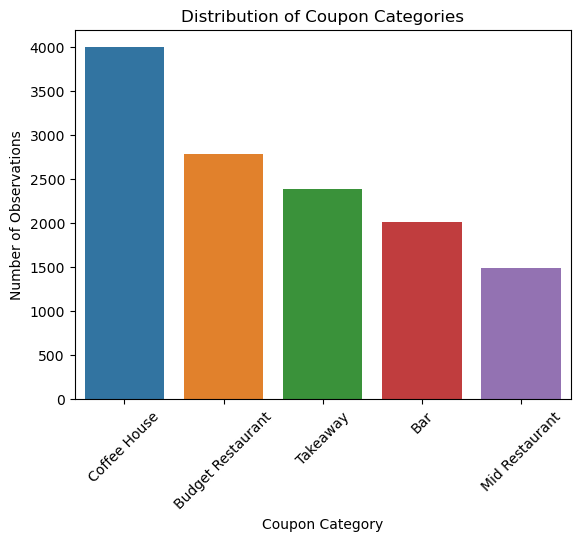

In [683]:
#Visualize the coupon column
coupon_value_counts = data['coupon'].value_counts()
coupon_counts_data = coupon_value_counts.reset_index()
coupon_counts_data.columns = ['Coupon', 'Count']

plt.figure
sns.barplot(x='Coupon', y='Count', data=coupon_counts_data)
plt.xlabel('Coupon Category')
plt.ylabel('Number of Observations')
plt.title('Distribution of Coupon Categories')
plt.xticks(rotation=45)
plt.savefig('images/01 Distribution of Coupon Categories.png', bbox_inches='tight')
plt.show()

6. Use a histogram to visualize the temperature column.

In [271]:
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



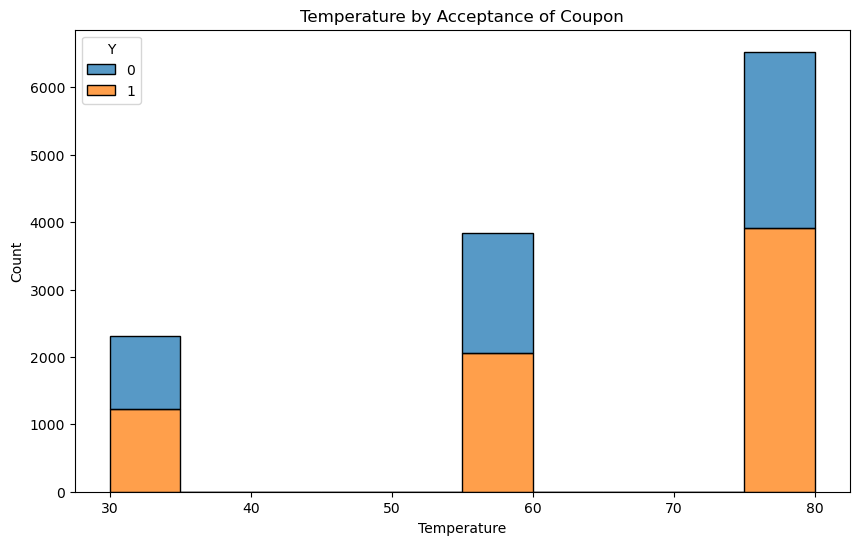

In [685]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', hue='Y', multiple='stack', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature by Acceptance of Coupon')
plt.savefig('images/02 Temperature by Acceptance of Coupon.png', bbox_inches='tight')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [394]:
barcoupon = data.query('coupon == "Bar"')
barcoupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [353]:
baraccept = barcoupon.Y.value_counts(normalize = True)
bar_accept_percentage = baraccept.get(1, 0) * 100
print(f"Percentage of participants that accepted the bar coupon: {bar_accept_percentage:.2f}%")

Percentage of participants that accepted the bar coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [396]:
#Clean the missing values
data_bar_cleaned = barcoupon.dropna(subset=['Bar'])
print(data_bar_cleaned['Bar'].isnull().sum())

0


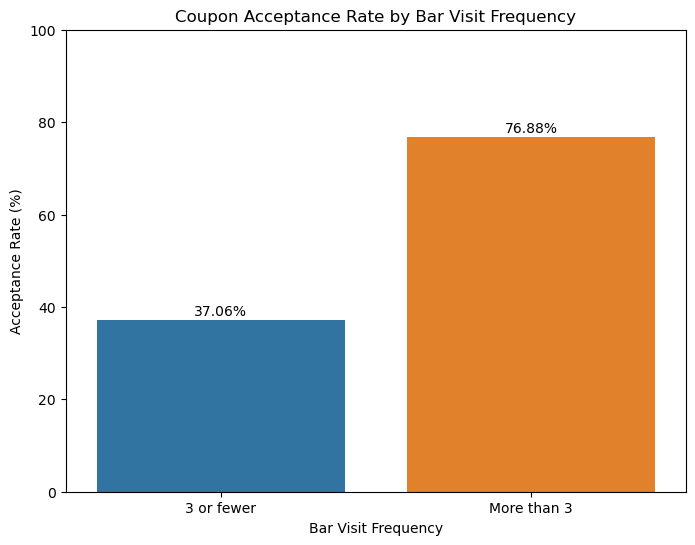

In [687]:
#Those who went to a bar 3 or fewer times a month
bar_3_or_fewer = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['never', 'less1', '1~3'])]
bar_3_or_fewer_accept = bar_3_or_fewer['Y'].mean() * 100

#Those who went more
bar_more_than_3 = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['4~8', 'gt8'])]
bar_more_than_3_accept = bar_more_than_3['Y'].mean() * 100

#Plot the data
plot_data = pd.DataFrame({
    'Segment': ['3 or fewer', 'More than 3'],
    'Acceptance Rate': [bar_3_or_fewer_accept, bar_more_than_3_accept]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Acceptance Rate', data=plot_data)
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylim(0, 100)
for i, rate in enumerate(plot_data['Acceptance Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/03 Coupon Acceptance Rate by Bar Visit Frequency.png', bbox_inches='tight')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [448]:
data_bar_cleaned['age'].value_counts()

age
21         416
26         392
31         334
50plus     281
36         206
41         171
46         109
below21     87
Name: count, dtype: int64

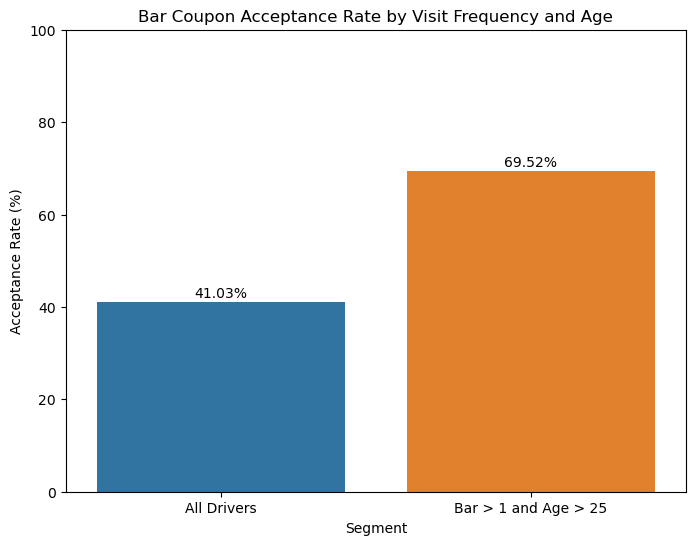

In [689]:
#Drivers who go to a bar more than once a month and are over the age of 25
bar_more_than_1 = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_than_1_over_25 = bar_more_than_1[bar_more_than_1['age'].isin(['26', '31', '36', '41', '46', '50plus'])]
bar_more_than_1_over_25_accept = bar_more_than_1_over_25['Y'].mean() * 100

#All others
all_drivers = data_bar_cleaned['Y'].mean() * 100

#Plot the two
plot_data = pd.DataFrame({
    'Segment': ['All Drivers', 'Bar > 1 and Age > 25'],
    'Acceptance Rate': [all_drivers, bar_more_than_1_over_25_accept]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Acceptance Rate', data=plot_data)
plt.xlabel('Segment')
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate by Visit Frequency and Age')
plt.ylim(0, 100)
for i, rate in enumerate(plot_data['Acceptance Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/04 Bar Coupon Acceptance Rate by Visit Frequency and Age.png', bbox_inches='tight')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [452]:
data_bar_cleaned['passanger'].value_counts()

passanger
Alone        1192
Friend(s)     331
Partner       270
Kid(s)        203
Name: count, dtype: int64

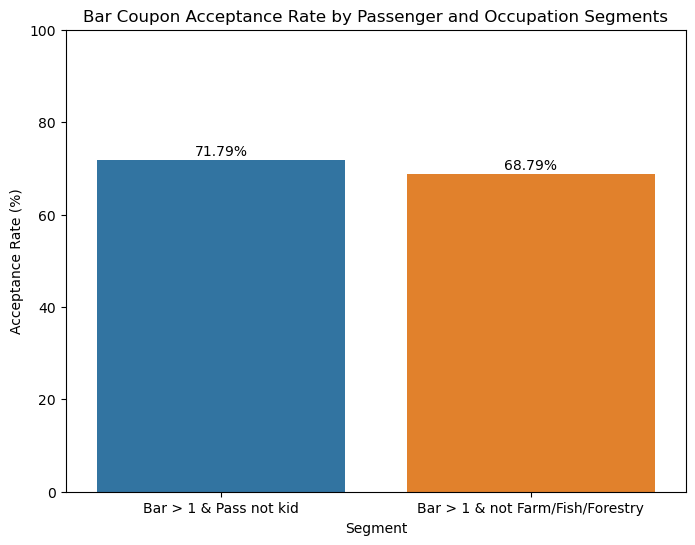

In [691]:
#Isolate the data
bar_more_than_1 = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_than_1_passanger = bar_more_than_1[bar_more_than_1['passanger'].isin(['Friend(s)', 'Partner'])]
bar_more_than_1_occupation = bar_more_than_1[~bar_more_than_1['occupation'].isin(['Farming Fishing & Forestry'])]

#Acceptance Rate
bar_more_than_1_passanger_acceptance = bar_more_than_1_passanger['Y'].mean() * 100
bar_more_than_1_occupation_acceptance = bar_more_than_1_occupation['Y'].mean() * 100

#Plot the two
plot_data = pd.DataFrame({
    'Segment': ['Bar > 1 & Pass not kid', 'Bar > 1 & not Farm/Fish/Forestry'],
    'Acceptance Rate': [bar_more_than_1_passanger_acceptance, bar_more_than_1_occupation_acceptance]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Acceptance Rate', data=plot_data)
plt.xlabel('Segment')
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate by Passenger and Occupation Segments')
plt.ylim(0, 100)
for i, rate in enumerate(plot_data['Acceptance Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/05 Bar Coupon Acceptance Rate by Passenger and Occupation Segments.png', bbox_inches='tight')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [494]:
data_bar_cleaned['maritalStatus'].value_counts()

maritalStatus
Married partner      871
Single               655
Unmarried partner    376
Divorced              73
Widowed               21
Name: count, dtype: int64

In [539]:
#Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_more_than_1 = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_than_1_passanger = bar_more_than_1[bar_more_than_1['passanger'].isin(['Friend(s)', 'Partner'])]
bar_more_than_1_passanger_not_widow = bar_more_than_1_passanger[~bar_more_than_1_passanger['maritalStatus'].isin(['Widowed'])]
bar_more_than_1_passanger_not_widow_acceptance = bar_more_than_1_passanger_not_widow['Y'].mean() * 100
print(bar_more_than_1_passanger_not_widow_acceptance)

71.7948717948718


In [537]:
#Drivers who go to bars more than once a month and are under the age of 30
bar_more_than_1 = data_bar_cleaned[data_bar_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_than_1_under_30 = bar_more_than_1[bar_more_than_1['age'].isin(['21', '26'])]
bar_more_than_1_under_30_acceptance = bar_more_than_1_under_30['Y'].mean() * 100
print(bar_more_than_1_under_30_acceptance)

73.13432835820896


In [523]:
#Clean missing values from Restauarant column
data_bar_rest_cleaned = data_bar_cleaned.dropna(subset=['RestaurantLessThan20'])
data_bar_rest_cleaned['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      871
4~8      563
less1    325
gt8      186
never     37
Name: count, dtype: int64

In [525]:
data_bar_rest_cleaned['income'].value_counts()

income
$25000 - $37499     313
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     259
$50000 - $62499     254
Less than $12500    159
$75000 - $87499     147
$87500 - $99999     142
$62500 - $74999     129
Name: count, dtype: int64

In [543]:
#Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_rest_more_than_4 = data_bar_rest_cleaned[data_bar_rest_cleaned['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
cheap_rest_more_than_4_less_50k = cheap_rest_more_than_4[cheap_rest_more_than_4['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
cheap_rest_more_than_4_less_50k_acceptance = cheap_rest_more_than_4_less_50k['Y'].mean() * 100
print(cheap_rest_more_than_4_less_50k_acceptance)

45.72271386430678


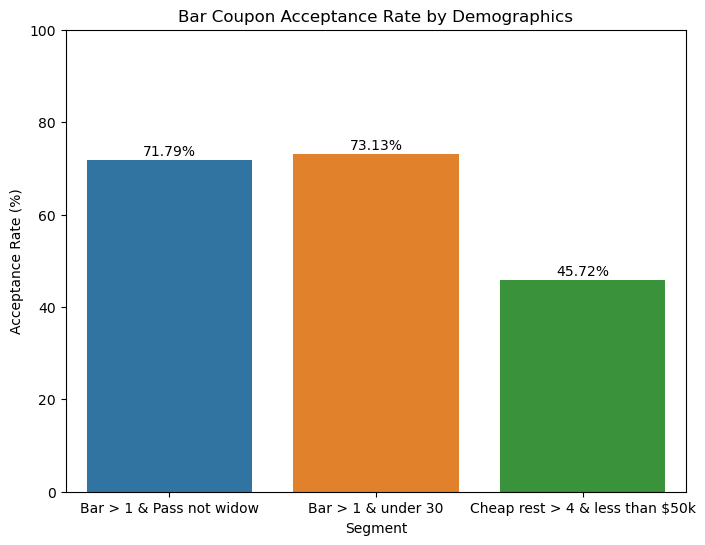

In [693]:
#Plot all three
plot_data = pd.DataFrame({
    'Segment': ['Bar > 1 & Pass not widow', 'Bar > 1 & under 30', 'Cheap rest > 4 & less than $50k'],
    'Acceptance Rate': [bar_more_than_1_passanger_not_widow_acceptance, bar_more_than_1_under_30_acceptance, cheap_rest_more_than_4_less_50k_acceptance]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Acceptance Rate', data=plot_data)
plt.xlabel('Segment')
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate by Demographics')
plt.ylim(0, 100)
for i, rate in enumerate(plot_data['Acceptance Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/06 Bar Coupon Acceptance Rate by Demographics.png', bbox_inches='tight')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#It appears that the greatest influence on whether a driver will accept a bar coupon is how frequently they visit a bar.
#Those who visit more than once a month have a much higher acceptance rate than other demographics, at over 70%
#Income also plays a role as those who earn less than $50k and visit cheap restuarants frequently are less likely to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [551]:
#Create the dataframe to investigate coupons for Coffee Houses
coffeecoupon = data.query('coupon == "Coffee House"')
coffeecoupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [562]:
#Clean the data 
data_coffee = coffeecoupon.dropna(subset=['CoffeeHouse'])
print(data_coffee['CoffeeHouse'].isnull().sum())

0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



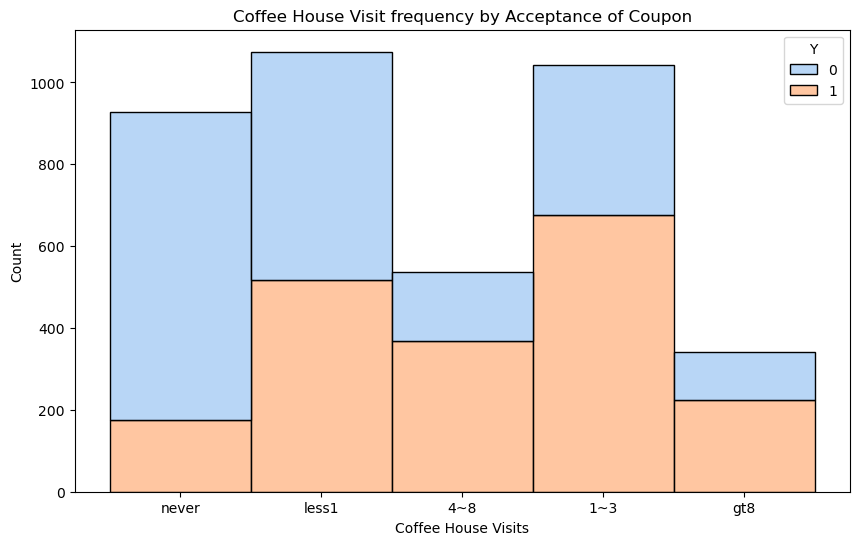

In [695]:
#Acceptance rate based on visits to coffee houses
coffee_1_3 = data_coffee[data_coffee['CoffeeHouse'] == '1~3']
income_acceptance = coffee_1_3.groupby('income')['Y'].mean() * 100
plot_data = income_acceptance.reset_index()


plt.figure(figsize=(10, 6))
sns.histplot(data=data_coffee, x='CoffeeHouse', hue='Y', multiple='stack', bins=10, palette='pastel')
plt.xlabel('Coffee House Visits')
plt.ylabel('Count')
plt.title('Coffee House Visit frequency by Acceptance of Coupon')
plt.savefig('images/07 Coffee House Visit frequency by Acceptance of Coupon.png', bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



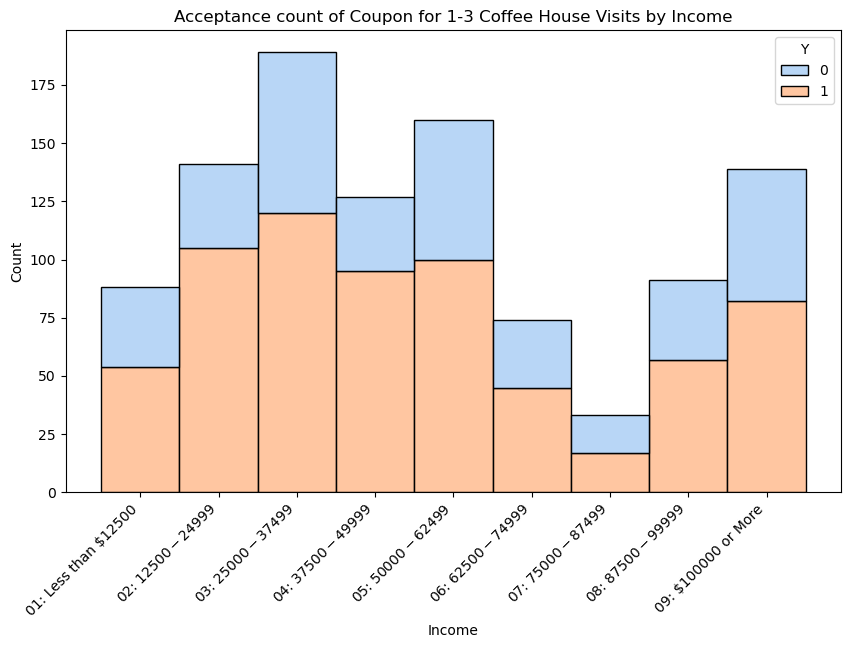

In [699]:
#Filter the data for 1-3 Coffee House visits
coffee_1_3 = data_coffee[data_coffee['CoffeeHouse'].isin(['1~3'])].copy()
coffee_1_3.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

#Create a mapping for the new income category names to categorize properly on chart
income_mapping = {
    'Less than $12500': '01: Less than $12500',
    '$12500 - $24999': '02: $12500 - $24999',
    '$25000 - $37499': '03: $25000 - $37499',
    '$37500 - $49999': '04: $37500 - $49999',
    '$50000 - $62499': '05: $50000 - $62499',
    '$62500 - $74999': '06: $62500 - $74999',
    '$75000 - $87499': '07: $75000 - $87499',
    '$87500 - $99999': '08: $87500 - $99999',
    '$100000 or More': '09: $100000 or More'
}

coffee_1_3.loc[:, 'income'] = coffee_1_3['income'].map(income_mapping)
coffee_sorted = coffee_1_3.sort_values(by='income')

#Plot raw count of coupon acceptance by income class
plt.figure(figsize=(10, 6))
sns.histplot(data=coffee_sorted, x='income', hue='Y', multiple='stack', bins=10, palette='pastel')
plt.xlabel('Income')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Acceptance count of Coupon for 1-3 Coffee House Visits by Income')
plt.savefig('images/08 Acceptance count of Coupon for 1-3 Coffee House Visits by Income.png', bbox_inches='tight')
plt.show()

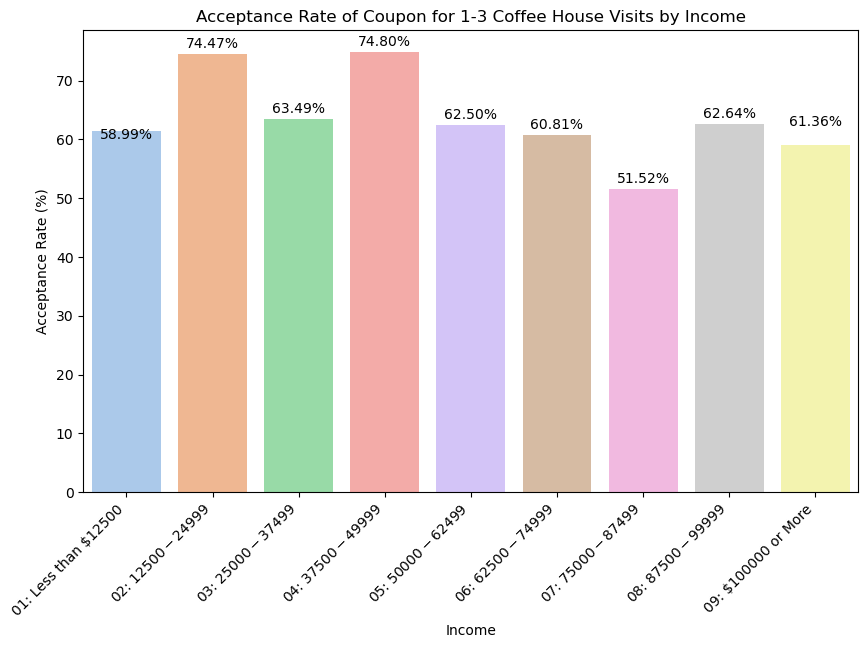

In [705]:
#Plot coupon acceptance rate by income class
income_acceptance = coffee_sorted.groupby('income')['Y'].mean() * 100
coffee_plot_data = income_acceptance.reset_index()
coffee_plot_data_sorted = coffee_plot_data.sort_values(by='income')

plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='Y', data=coffee_plot_data_sorted, palette='pastel')
plt.xlabel('Income')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate of Coupon for 1-3 Coffee House Visits by Income')
for i, rate in enumerate(plot_data['Y']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/09 Acceptance Rate of Coupon for 1-3 Coffee House Visits by Income.png', bbox_inches='tight')
plt.show()

In [649]:
coffee_sorted.value_counts('time')

time
6PM     296
7AM     235
2PM     231
10AM    221
10PM     59
Name: count, dtype: int64

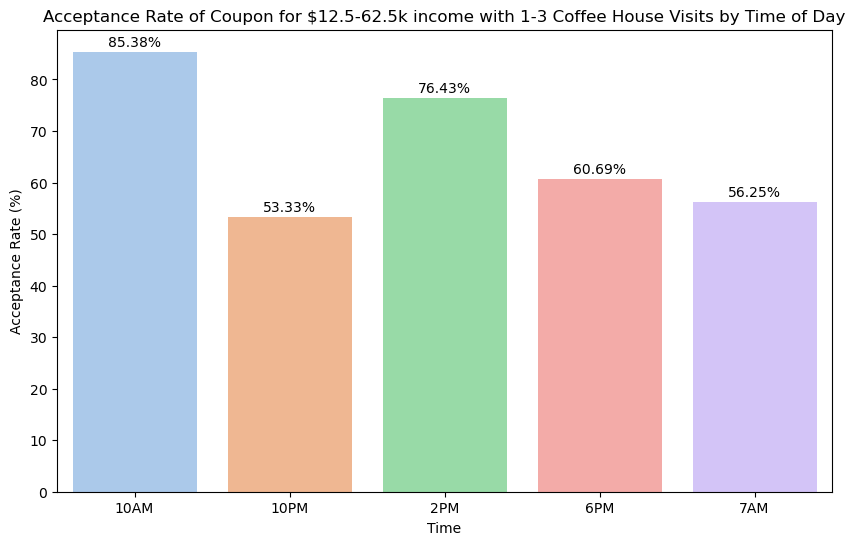

In [709]:
#Isolate most frequent coffee house visits by income brackets from $12.5 to $62.5 to calculate acceptance by time of day
coffee_1_3_income_25k = coffee_sorted[coffee_sorted['income'].isin(['02: $12500 - $24999', '03: $25000 - $37499', '04: $37500 - $49999', '05: $50000 - $62499'])]
time_acceptance = coffee_1_3_income_25k.groupby('time')['Y'].mean() * 100
time_acceptance_plot = time_acceptance.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='Y', data=time_acceptance_plot, palette='pastel')
plt.xlabel('Time')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate of Coupon for $12.5-62.5k income with 1-3 Coffee House Visits by Time of Day')
for i, rate in enumerate(time_acceptance_plot['Y']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center')
plt.savefig('images/10 Acceptance of Coupon for $12.5-62.5k income with 1-3 Coffee House Visits by Time of Day.png', bbox_inches='tight')
plt.show()

In [ ]:
#People who visit Coffee Houses 1-3 times are more likely to accept the coupon
#From those who visit 1-3 times, income brackets from $12.5-62.5k were more likely to accept the coupon
#From those income brackets, the highest acceptance rate of the coupon was 85% at 10am; the second highest was 76% at 2pm.